In [55]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/TimeSeries/Retail_Gold/gold_historical_data.csv'

import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check the first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-02-05,1157.800049,1157.800049,1174.800049,1146.000000,1155.599976,877
1,2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931
2,2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700
3,2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671
4,2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995


In [56]:
len(df)

2510

In [57]:
# Parse date
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

# Set date as index and sort
df = df.set_index('Date').sort_index()

In [58]:
# Basic date parts
df['day_of_week'] = df.index.dayofweek        # 0=Mon, 6=Sun
df['day_of_month'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week.astype(int)
df['month'] = df.index.month

# Weekend flag
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [59]:
import numpy as np

# Day of week (7)
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Day of month (31)
df['dom_sin'] = np.sin(2 * np.pi * df['day_of_month'] / 31)
df['dom_cos'] = np.cos(2 * np.pi * df['day_of_month'] / 31)

# Month (12)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Week of year (52)
df['woy_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
df['woy_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

In [60]:
# The previous day price
df['Adj_Cls_lag_1'] = df['Adj Close'].shift(1)

In [61]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,day_of_week,day_of_month,week_of_year,month,is_weekend,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos,woy_sin,woy_cos,Adj_Cls_lag_1
Date,,,,,,,,,,,,,,,,,,,,
2016-02-05,1157.800049,1157.800049,1174.800049,1146.000000,1155.599976,877,4,5,5,2,0,-0.433884,-0.900969,0.848644,0.528964,0.866025,0.5,0.568065,0.822984,NaN
2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931,0,8,6,2,0,0.000000,1.000000,0.998717,-0.050649,0.866025,0.5,0.663123,0.748511,1157.800049
2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700,1,9,6,2,0,0.781831,0.623490,0.968077,-0.250653,0.866025,0.5,0.663123,0.748511,1197.900024
2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671,2,10,6,2,0,0.974928,-0.222521,0.897805,-0.440394,0.866025,0.5,0.663123,0.748511,1198.699951
2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995,3,11,6,2,0,0.433884,-0.900969,0.790776,-0.612106,0.866025,0.5,0.663123,0.748511,1194.699951


In [62]:
# Handle missing values from lagging
# Lag features introduce NaNs at the beginning.

df = df.dropna()

In [63]:
# drop columns which can cause misunderstanding for LSTM model
df = df.drop(
    columns=[
        'day_of_week',
        'day_of_month',
        'month',
        'week_of_year'
    ]
)

In [64]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,is_weekend,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos,woy_sin,woy_cos,Adj_Cls_lag_1
Date,,,,,,,,,,,,,,,,
2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931,0,0.000000,1.000000,0.998717,-0.050649,0.866025,0.5,0.663123,0.748511,1157.800049
2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700,0,0.781831,0.623490,0.968077,-0.250653,0.866025,0.5,0.663123,0.748511,1197.900024
2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671,0,0.974928,-0.222521,0.897805,-0.440394,0.866025,0.5,0.663123,0.748511,1198.699951
2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995,0,0.433884,-0.900969,0.790776,-0.612106,0.866025,0.5,0.663123,0.748511,1194.699951
2016-02-12,1239.099976,1239.099976,1247.800049,1233.500000,1247.800049,250,0,-0.433884,-0.900969,0.651372,-0.758758,0.866025,0.5,0.663123,0.748511,1247.900024


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2509 entries, 2016-02-08 to 2026-01-30
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Adj Close      2509 non-null   float64
 1   Close          2509 non-null   float64
 2   High           2509 non-null   float64
 3   Low            2509 non-null   float64
 4   Open           2509 non-null   float64
 5   Volume         2509 non-null   int64  
 6   is_weekend     2509 non-null   int64  
 7   dow_sin        2509 non-null   float64
 8   dow_cos        2509 non-null   float64
 9   dom_sin        2509 non-null   float64
 10  dom_cos        2509 non-null   float64
 11  month_sin      2509 non-null   float64
 12  month_cos      2509 non-null   float64
 13  woy_sin        2509 non-null   float64
 14  woy_cos        2509 non-null   float64
 15  Adj_Cls_lag_1  2509 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 333.2 KB
None


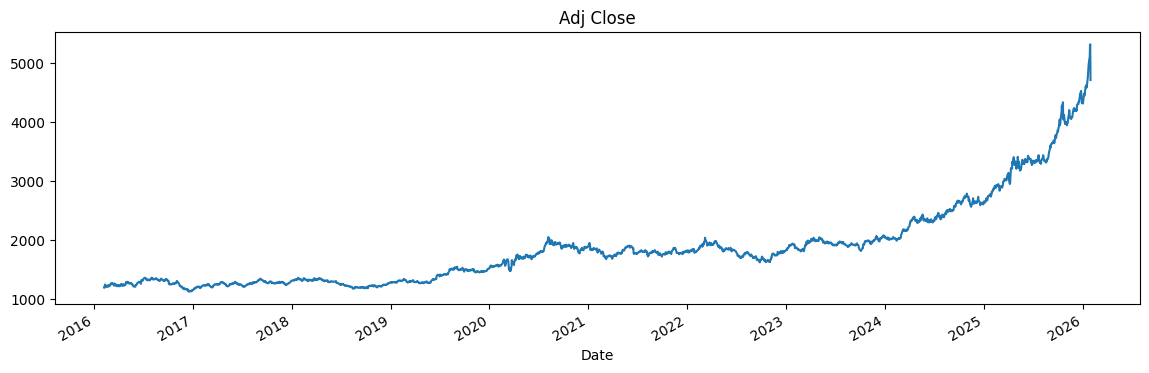

In [66]:
import matplotlib.pyplot as plt

df['Adj Close'].plot(figsize=(14,4), title='Adj Close')
plt.show()

In [67]:
# check missing
print("Any nulls?", df.isnull().any().any())

Any nulls? False


In [68]:
# Total number of observations
n = len(df)

# Indices for splits
train_end = int(n * 0.60)
val_end = int(n * 0.80)

# Split the data
df_train = df.iloc[:train_end]
df_val   = df.iloc[train_end:val_end]
df_test  = df.iloc[val_end:]

# Sanity checks
print("Train:", df_train.shape)
print("Validation:", df_val.shape)
print("Test:", df_test.shape)

Train: (1505, 16)
Validation: (502, 16)
Test: (502, 16)


In [69]:
# Target variable
target = 'Adj Close'

# Categorical features
categorical_features = [
    'is_weekend'
]


# Numerical features
numerical_features = [

    'Volume',
    'Open',
    'Close',
    'Low',
    'High',

    # Cyclical encodings
    'dow_sin',
    'dow_cos',
    'dom_sin',
    'dom_cos',
    'month_sin',
    'month_cos',
    'woy_sin',
    'woy_cos',

    # Lagged sales
    'Adj_Cls_lag_1'
]

In [70]:
# Split features and target
X_train = df_train[categorical_features + numerical_features]
y_train = df_train[target]

X_val = df_val[categorical_features + numerical_features]
y_val = df_val[target]

X_test = df_test[categorical_features + numerical_features]
y_test = df_test[target]

In [43]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Feature preprocessor (X)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Fit ONLY on training features
X_train_processed = preprocessor.fit_transform(X_train)

# Transform validation and test features
X_val_processed  = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("X train shape:", X_train_processed.shape)
print("X val shape:", X_val_processed.shape)
print("X test shape:", X_test_processed.shape)

X train shape: (1505, 15)
X val shape: (502, 15)
X test shape: (502, 15)


In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Target scaler
y_scaler = StandardScaler()

# Fit ONLY on training target
y_train_processed = y_scaler.fit_transform(
    y_train.values.reshape(-1, 1)
)

# Transform validation and test target
y_val_processed = y_scaler.transform(
    y_val.values.reshape(-1, 1)
)

y_test_processed = y_scaler.transform(
    y_test.values.reshape(-1, 1)
)

print("y train shape:", y_train_processed.shape)
print("y val shape:", y_val_processed.shape)
print("y test shape:", y_test_processed.shape)

y train shape: (1505, 1)
y val shape: (502, 1)
y test shape: (502, 1)


In [45]:
import numpy as np

def create_sliding_windows(X, y, window_size):
    X_windows = []
    y_windows = []

    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])
        y_windows.append(y[i + window_size, 0])

    return np.array(X_windows), np.array(y_windows)


window_size = 30

X_train_win, y_train_win = create_sliding_windows(
    X_train_processed, y_train_processed, window_size
)

X_val_win, y_val_win = create_sliding_windows(
    X_val_processed, y_val_processed, window_size
)

X_test_win, y_test_win = create_sliding_windows(
    X_test_processed, y_test_processed, window_size
)

print("Train windows:", X_train_win.shape, y_train_win.shape)
print("Val windows:", X_val_win.shape, y_val_win.shape)
print("Test windows:", X_test_win.shape, y_test_win.shape)

Train windows: (1475, 30, 15) (1475,)
Val windows: (472, 30, 15) (472,)
Test windows: (472, 30, 15) (472,)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 30, 32)         │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,601 (57.04 KB)

 Trainable params: 14,601 (57.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5363 - mae: 0.5837 - val_loss: 0.2937 - val_mae: 0.4682
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1005 - mae: 0.2373 - val_loss: 0.2030 - val_mae: 0.3821
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0748 - mae: 0.2084 - val_loss: 0.1607 - val_mae: 0.3406
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0657 - mae: 0.1936 - val_loss: 0.0971 - val_mae: 0.2590
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0581 - mae: 0.1770 - val_loss: 0.1109 - val_mae: 0.2758
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0503 - mae: 0.1703 - val_loss: 0.1030 - val_mae: 0.2642
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0477 - mae: 0.1625 - val_loss: 0.1047 - val_mae: 0.2674
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0495 - mae: 0.1642 - val_loss: 0.0972 - val_mae: 0.2644
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - lo

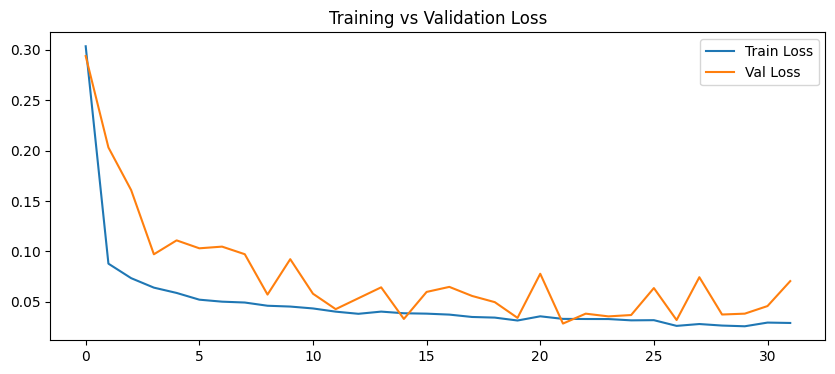

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def build_lstm_model(
    input_shape,
    lstm_units_1=32,
    lstm_units_2=32,
    dense_units=4,
    dropout_rate=0.5,
    learning_rate=0.001
):
    model = Sequential()

    model.add(
        LSTM(
            lstm_units_1,
            return_sequences=True,
            input_shape=input_shape
        )
    )

    model.add(LSTM(lstm_units_2))
    model.add(Dropout(dropout_rate))

    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )

    return model



input_shape = (X_train_win.shape[1], X_train_win.shape[2])

model = build_lstm_model(input_shape)
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    X_train_win,
    y_train_win,
    validation_data=(X_val_win, y_val_win),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


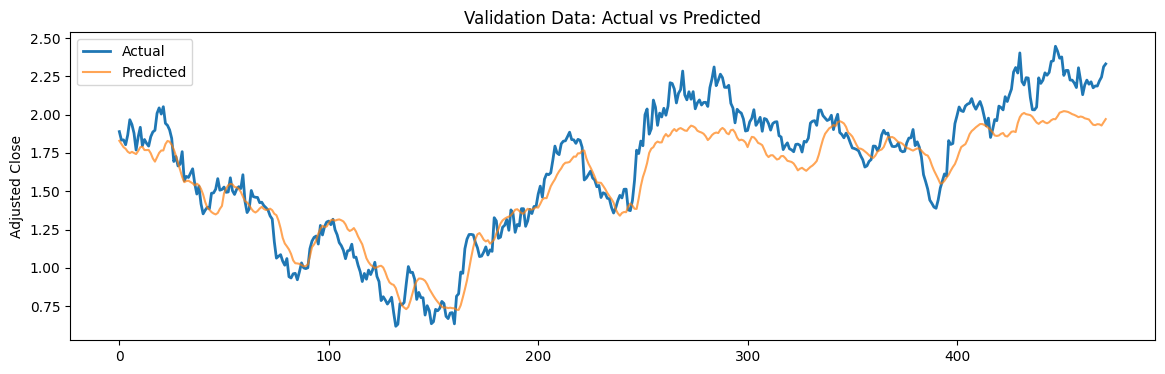

In [51]:
import numpy as np

# Predict on validation data
y_val_pred = model.predict(X_val_win).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(y_val_win, label='Actual', linewidth=2)
plt.plot(y_val_pred, label='Predicted', alpha=0.7)
plt.title('Validation Data: Actual vs Predicted')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


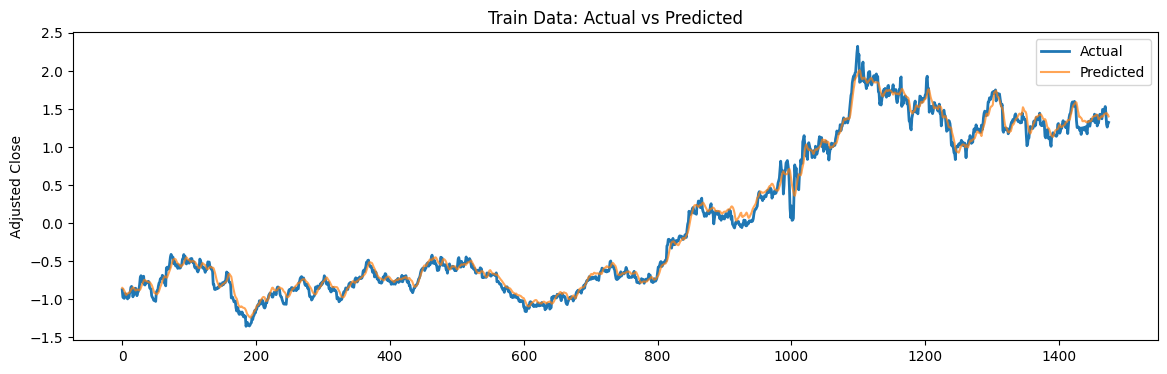

In [52]:
import numpy as np

# Predict on train data
y_train_pred = model.predict(X_train_win).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(y_train_win, label='Actual', linewidth=2)
plt.plot(y_train_pred, label='Predicted', alpha=0.7)
plt.title('Train Data: Actual vs Predicted')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


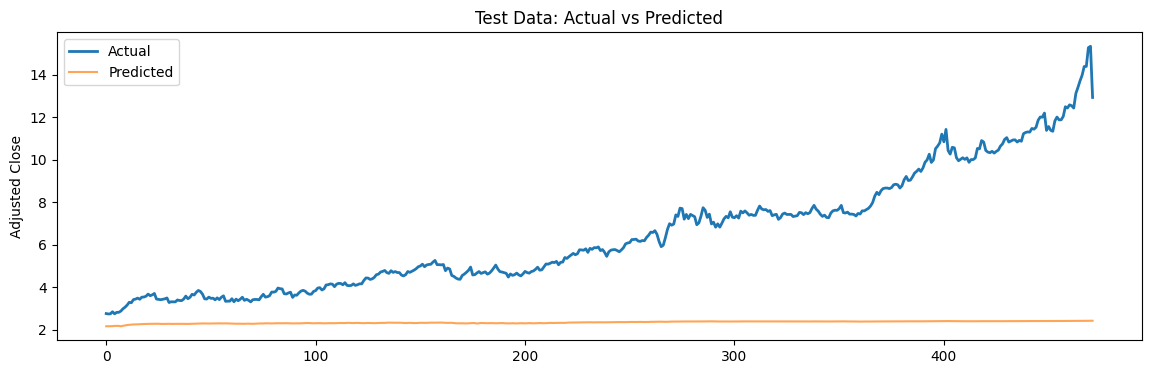

In [53]:
import numpy as np

# Predict on test data
y_test_pred = model.predict(X_test_win).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(y_test_win, label='Actual', linewidth=2)
plt.plot(y_test_pred, label='Predicted', alpha=0.7)
plt.title('Test Data: Actual vs Predicted')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

In [73]:
print("Train lag mean/std:",
      X_train['Adj_Cls_lag_1'].mean(),
      X_train['Adj_Cls_lag_1'].std())

print("Test lag mean/std:",
      X_test['Adj_Cls_lag_1'].mean(),
      X_test['Adj_Cls_lag_1'].std())

Train lag mean/std: 1467.4558137912686 251.12612073538529
Test lag mean/std: 3024.557364779165 711.6823673372962


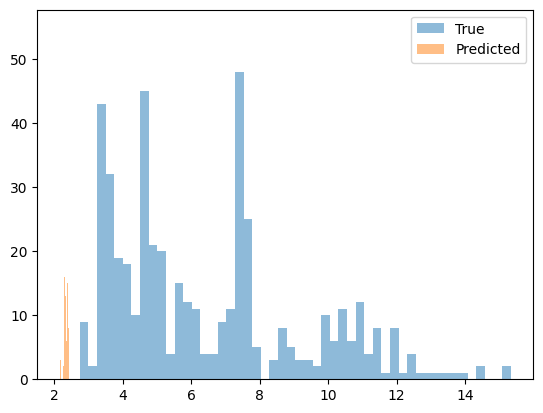

In [75]:
plt.hist(y_test_win, bins=50, alpha=0.5, label='True')
plt.hist(y_test_pred, bins=50, alpha=0.5, label='Predicted')
plt.legend()